#### Micah Oeur

**(a)** Using the impulse approximation, estimate the impact parameter $b$ required for the mass $M$ to cause an order unity change in the (vector) velocity of the point mass. Given: $\Delta t \sim 2b/v_{rel}$ at a distance from the massive body comparable to the closest approach distance. Write your answer in terms of $R$, $v_{rel}$, and the escape velocity from the body, $v_{esc} = (2GM/R)^{1/2}$. Is the change in the magnitude of the velocity, its direction, or both?


$\Delta v \sim v_{rel}$

Impulse appx: $m \Delta v \sim F\Delta t$

$$m v_{rel} \sim  F\Delta t$$

Given: $\Delta t \sim 2b/v_{rel}$ and $F = GMm/b^2$,

$$v_{rel} \sim \frac{GMm}{b^2}\frac{2b}{m v_{rel}} $$

$$v_{rel} \sim  \frac{2GM}{bv_{rel}}$$

isolating $b$,

$$b \sim \frac{2GM}{v_{rel}^2}$$.

Given $v_{esc}^2R$ = 2GM ,

$$b \sim R \frac{v_{esc}^2}{v_{rel}^2}$$

The test particle experiences a significant change in direction, deflected due to strong scattering from the massive body. The velocity magnitude returns to $v_{rel}$ after being scattered.

**(b)** Use conservation of energy and angular momentum to calculate the impact parameter at which the test particle will graze the massive body’s surface. Write your answer in terms of $R$, $v_{rel}$, and $v_{esc}$.

Conservation of energy: 

$$\frac{1}{2}v_i^2 - \frac{GM}{r_i} = \frac{1}{2}v_f^2 - \frac{GM}{r_f}$$

with $v_{i} = v_{rel} and r_{i} = \inf$ since our test particle is coming from infinity. $r_{f} = R$, radius of massive body and $v_{f} = v_{graze}$.

$$ \frac{1}{2}v_{rel}^2 - \frac{GM}{\inf} = \frac{1}{2}v_{graze}^2 - \frac{GM}{R} $$

$ \vec{L} $ conservation:

$$Mv_{i}r_{i} = Mv_{f}r_{f}$$

$$Mv_{rel}b = Mv_{graze}R$$

$$\frac{v_{rel}b}{R} = v_{graze}$$

$$v_{rel}^2 = \frac{2v_{rel}^2 b^{2}}{2R^{2}} - \frac{2GM}{R}$$

$$v_{rel}^2(1-\frac{b^{2}}{R^{2}}) = -(\frac{2GM}{R})$$

where $\frac{2GM}{R} = v_{esc}^2$.

$$v_{rel}^2(1-\frac{b^{2}}{R^{2}}) = -v_{esc}^2$$

$$1-\frac{b^{2}}{R^{2}} = -\frac{v_{esc}^2}{v_{rel}^2}$$

$$-\frac{b^{2}}{R^{2}} = -1 - \frac{v_{esc}^2}{v_{rel}^2}$$

$$\frac{b^{2}}{R^{2}} = 1 + \frac{v_{esc}^2}{v_{rel}^2}$$

$$b^{2} = R^{2}(1 + \frac{v_{esc}^2}{v_{rel}^2})$$

$$b = R\left( 1 + \frac{v_{esc}^2}{v_{rel}^2}\right) ^{1/2}$$

**(c)** Now we will integrate the equations of motion to see how the actual trajectory of a particle coming in at each of these impact parameters behaves. We will employ a general numerical ODE solver. (It’s useful to have at least one of these in your tool kit!) Please use the Python function `scipy.integrate.solve_ivp`, which allows you to choose from several different methods to solve a system of ordinary differential equations. Its documentation is on the website in this footnote1. There are examples at the bottom of the documentation page. You will need to linearize your equations of motion, so that your variables are $(x, y, v_x, v_y)$ and their time derivatives are $(v_x, v_y, F_x, F_y)$, where $F_x$ and $F_y$ refer to the acceleration due to gravity from the point mass. Here is an example function call: `sol = solve_ivp(pointgrav2D, [tstart,tstop], coords0, t_eval=t, args=(GM,))` where `pointgrav2d(t, coords, GM)` is a function written by you defining the equations of motion, the initial conditions vector `coords0` has the form $[x_0, y_0, v_{x0}, v_{y0}]$, `tstart` and `tstop` are the starting and ending times of the integration, and `t` is a vector containing the times at which output will be generated (e.g., `t = np.linspace(tstart,tstop,num=nts)` if you want `nts` total output times).

Use units of $M= 1$, $R = 1$, and $G = 1$. The choice of $G = 1$ sets the unit of time, as can be seen from considering the gravitational force equation $F = GMm/R^2$ . In these units, the escape velocity from the object is $v_{esc} = \sqrt{2GM/R} = \sqrt{2}$. We will pick an initial relative velocity of $v_{rel} = v_{esc}/2 \lt v_{esc}$ so that gravitational focusing operates. Place the massive body at the origin. Start your test particle at $x = −10$ with initial velocity $v_x = v_{rel} = v_{esc}/2$ and $v_y = 0$. Choose the following values for $y$: $b_{coll}$, $b_{scat}$, and $2b_{scat}$, where $b_{coll}$ is the impact parameter for collisions calculated in part **(b)** and $b_{scat}$ is the impact parameter for strong scattering calculated in part **(a)**. Do the trajectories look like you expected?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [17]:
def pointgrav2d(t, coords, GM):
    x, y, vx, vy = coords #initial conditions vector
    r = np.sqrt(x**2 + y**2)
    Fx =  - (GM * x) / r**3 #acceleration due to gravity from pt mass
    Fy = - (GM * y) / r**3 #acceleration due to gravity from pt mass
    deriv = [vx, vy, Fx, Fy] 
    
    return deriv

In [5]:
# variables

M = 1.
R = 1.
G = 1. #sets unit of time

GM = G * M

x0 = -10. #initial position

v_esc = np.sqrt((2.*GM)/R) # np.sqrt(2.)
#v_x
v_rel = v_esc / 2. # < v_esc
v_y = 0.

tstart = 0.
tstop = 40.
nts = 1000

t = np.linspace(tstart, tstop, nts)

b_coll = R * np.sqrt((1 + (v_esc / v_rel)**2)) #collision, grazing,part (b)
b_scat = R * (v_esc / v_rel)**2 #strong scattering, part (a)
b_scat2 = 2. * b_scat #weak scattering

In [14]:
# #3 different impact parameters, 4 variables (x0, y0, vx0, vy0)
coords0 = np.zeros((3,4))

coords0[0,:] = [-10.,b_coll,v_rel,0.] # collision
coords0[1,:] = [-10.,b_scat,v_rel,0.] # strong scattering
coords0[2,:] = [-10.,b_scat2,v_rel,0.] # weak scattering

In [15]:
xs = np.zeros((3,nts))
ys = np.zeros((3,nts))

In [18]:
for i in range(3):
    sol = solve_ivp(pointgrav2d, [tstart,tstop], coords0[i,:], t_eval=t, args=(GM,))
    xs[i] = sol.y[0]
    ys[i] = sol.y[1]

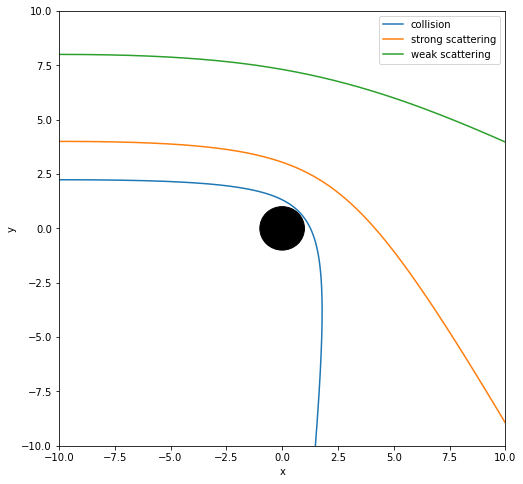

In [20]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(xs[0], ys[0], label='collision')
plt.plot(xs[1], ys[1], label='strong scattering')
plt.plot(xs[2], ys[2], label='weak scattering')

# add a circle at the origin representing the massive body
circle = plt.Circle((0, 0), radius=1., color='k')
plt.gca().add_patch(circle)

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

It looks like what I'd expect because the collision path grazes the surface of the massive body, the strong scattering shows the test particle being significantly deflected (large change in direction), and the mild interaction has the test particle only slightly deflected. The strong scattering path has a smaller impact parameter than the weak scattering path, so the test particle following the green line is less affected by the massive body than the test particle following the orange path is.